# **Phương pháp sai phân giải bài toán biên**






## 1.  Bài toán biên







 **Phương trình vi phân:**
$$\left[p(x)u'(x)\right]'-q(x)u(x)=-f(xx)$$ 
*   Điều kiện biên loại 1:
$$\left\{\begin{aligned}
u(a)=\alpha\\
u(b)=\beta
\end{aligned}\right.$$
*   Điều kiện biên loại 2:
$$\left\{\begin{aligned}
p(a)u'(a)=-\mu_1\\
p(b)u'(b)=-\mu_2
\end{aligned}\right.$$
*   Điều kiện biên loại 3
$$\left\{\begin{aligned}
p(a)u'(a)-\sigma_1u(a)=-\mu_1\\
p(b)u'(b)-\sigma_2u(b)=-\mu_2
\end{aligned}\right.$$
Trong đó: $\sigma_i\geq0, \sigma_1+\sigma_2>0$






**Thuật toán**



*   Điều kiện biên loại 1:
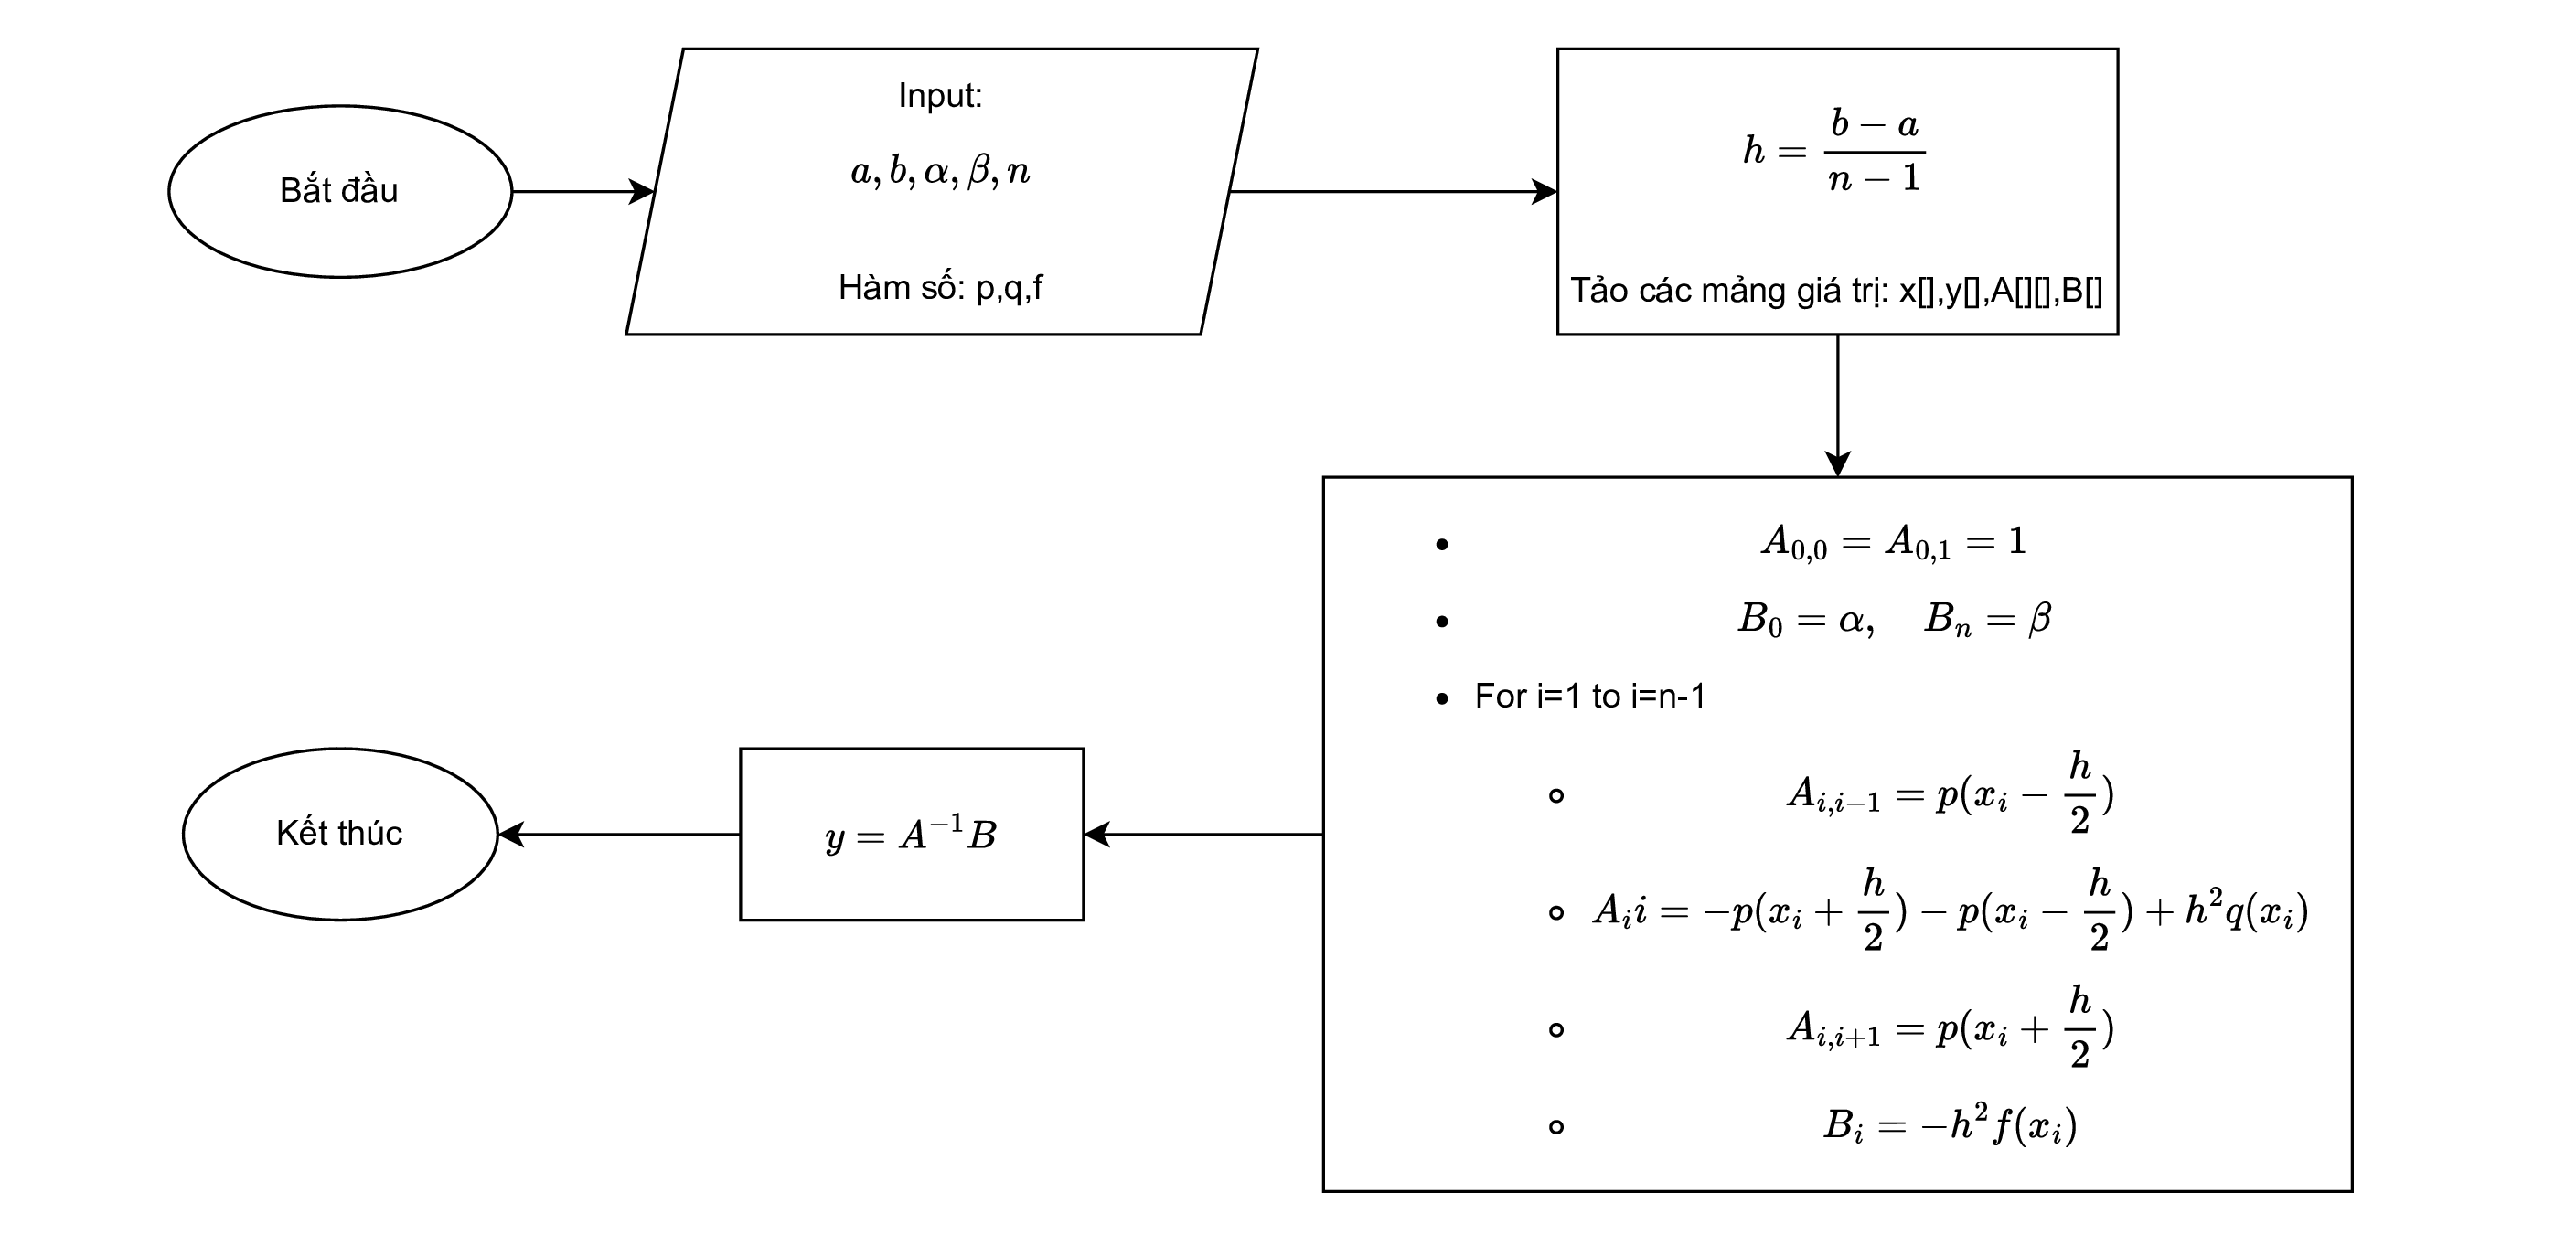
*   Điều kiện biên loại 2:
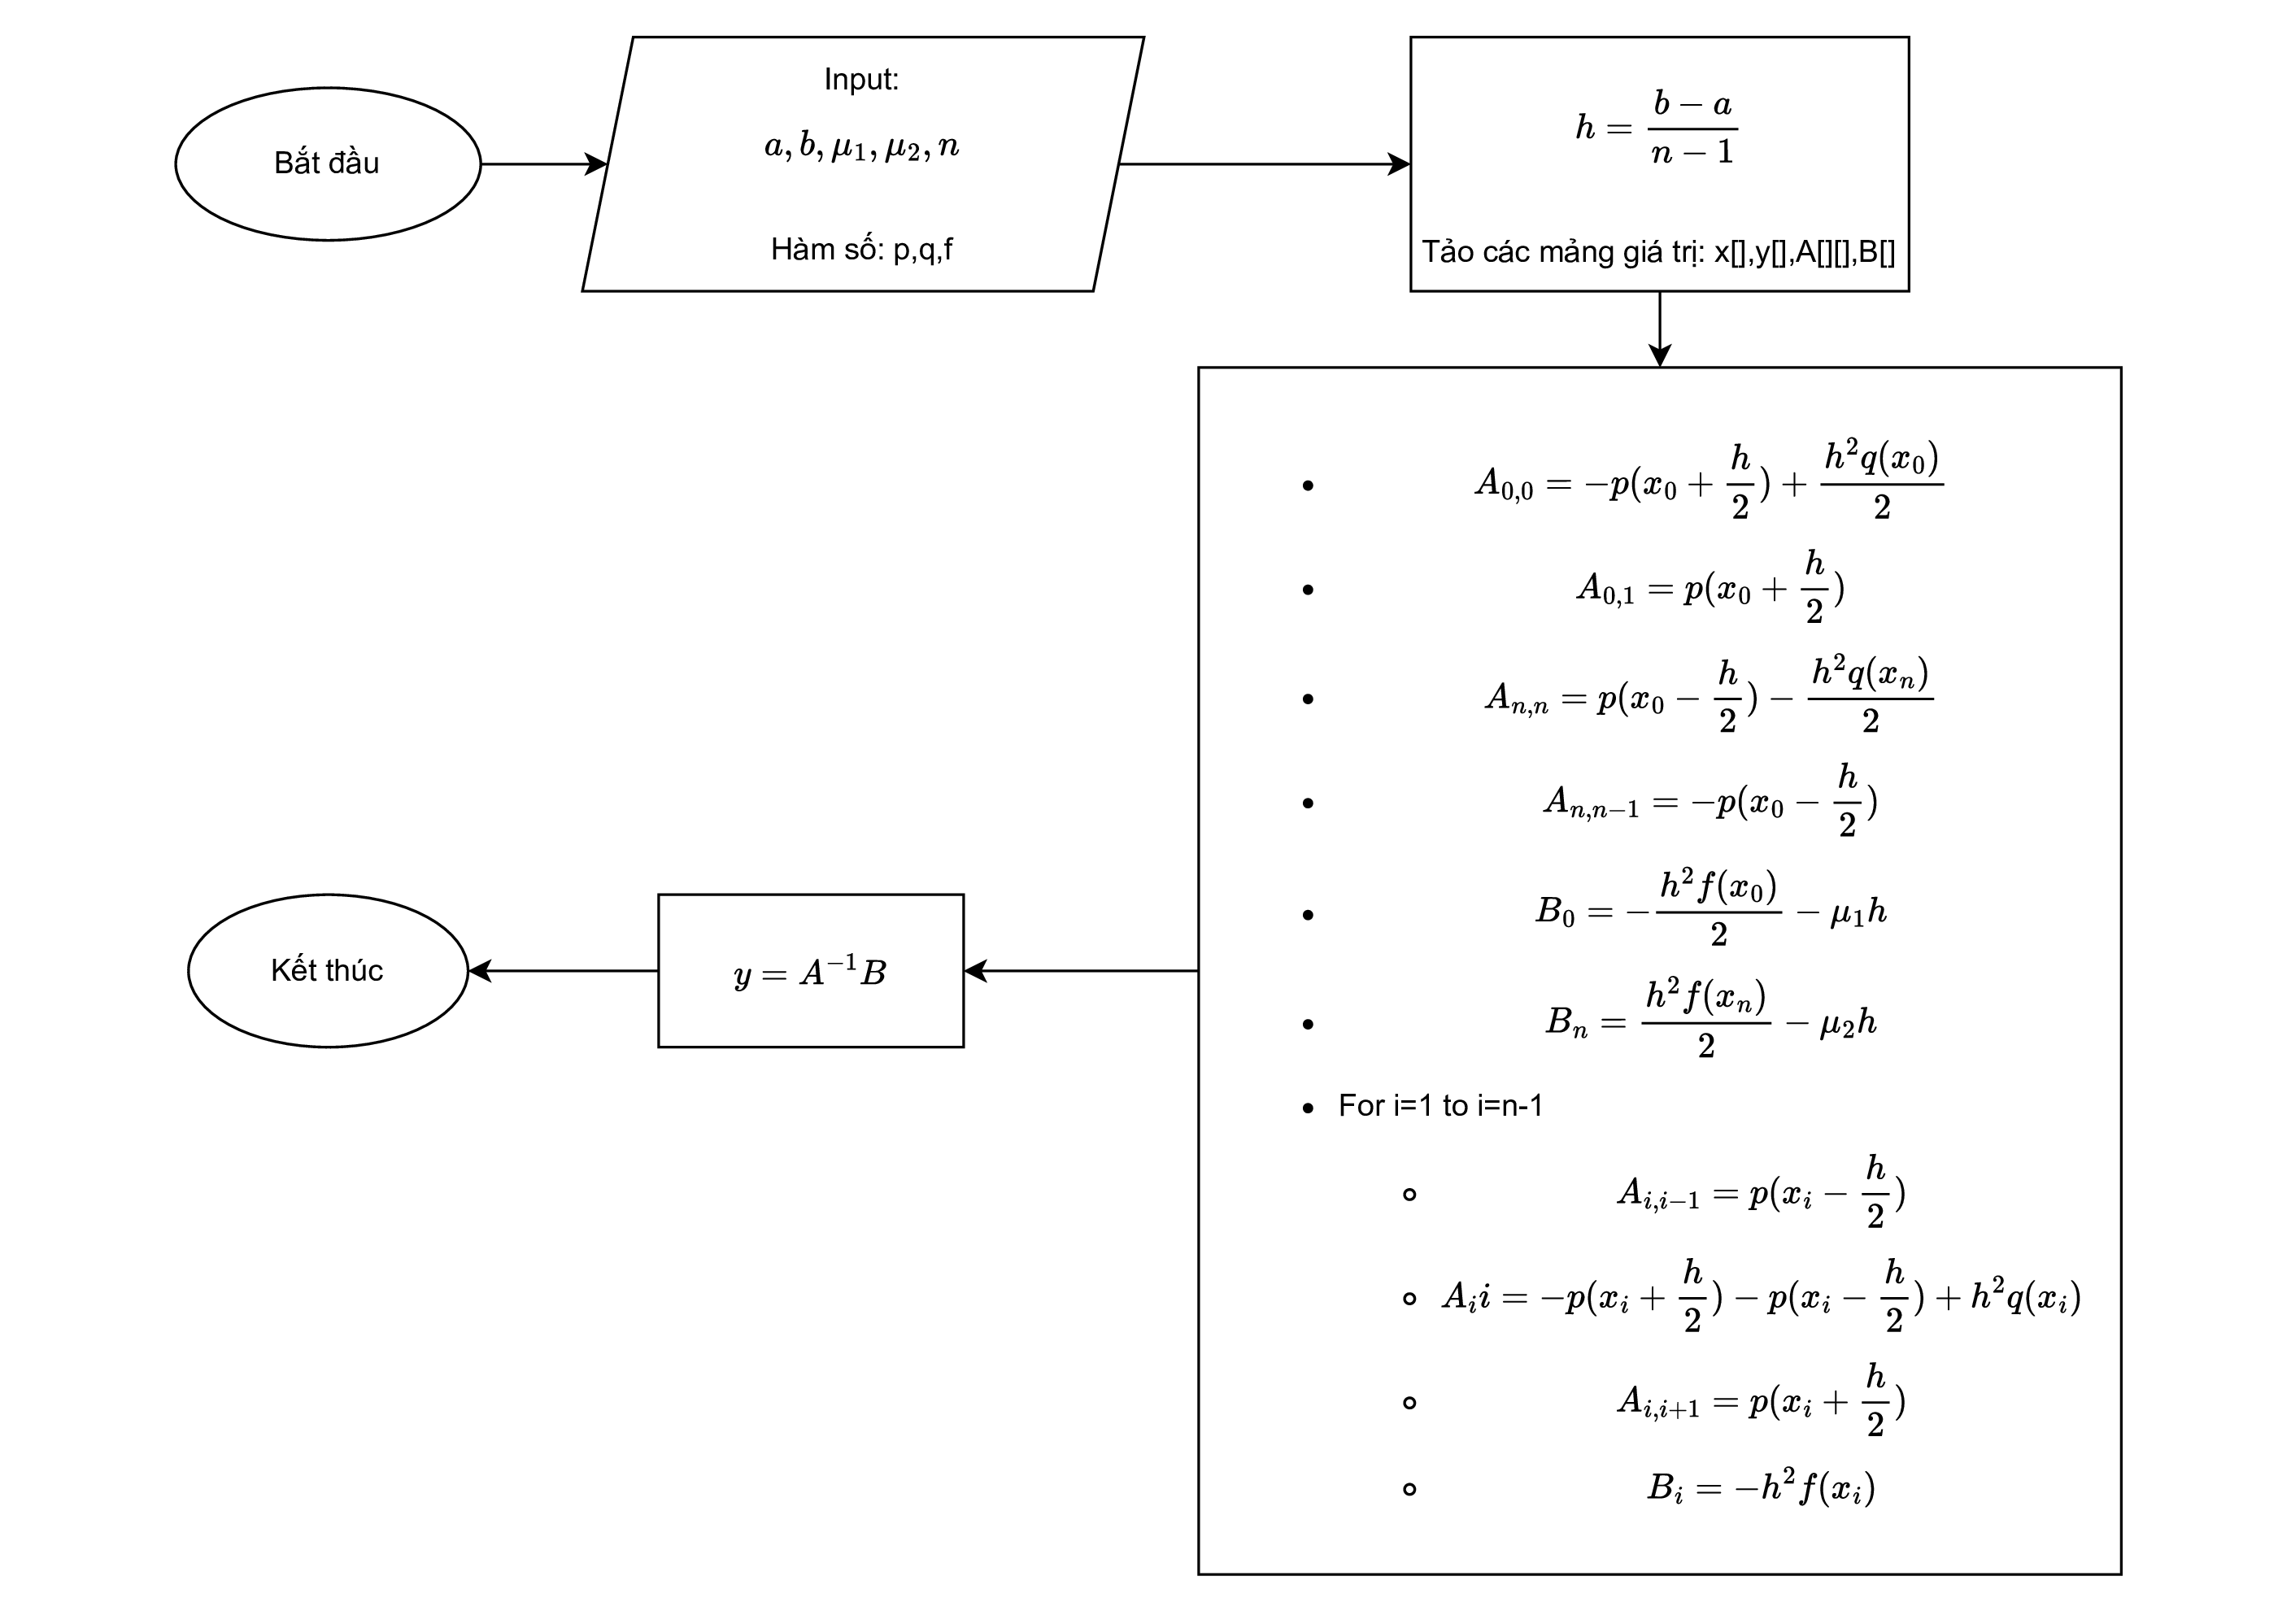
*   Điều kiện biên loại 3:
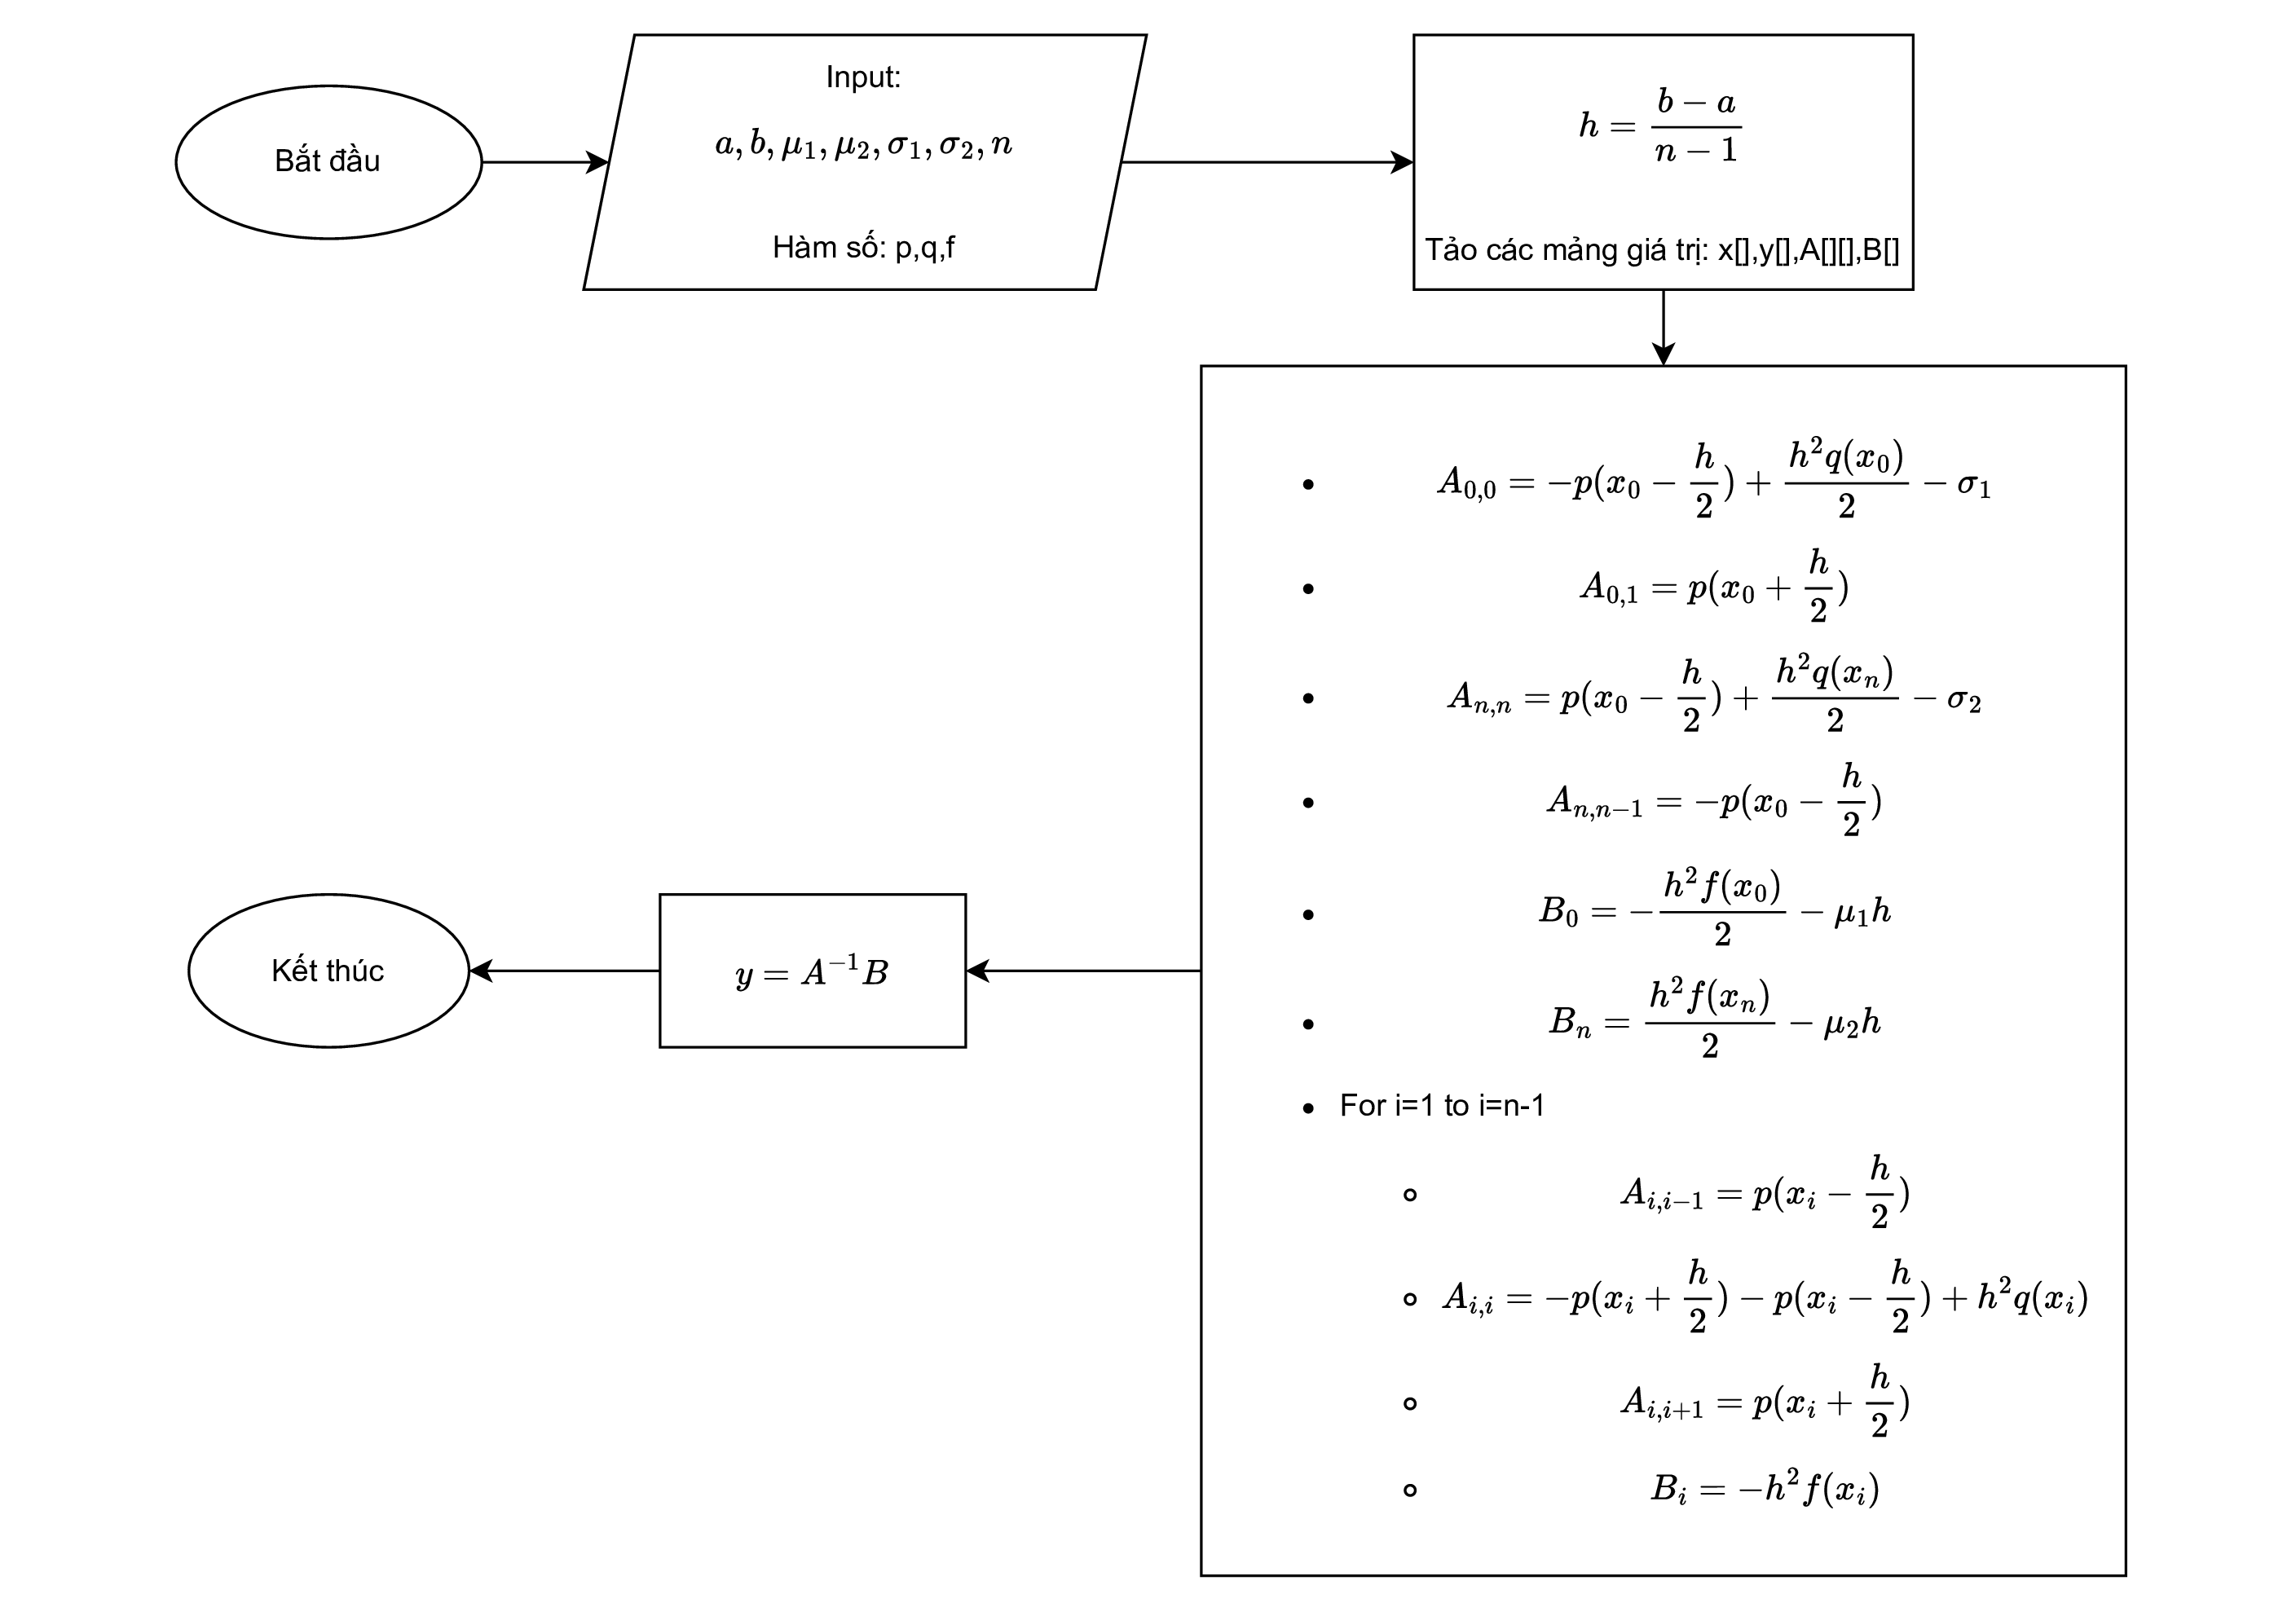





**Các thư viện cần thiết **

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython import display

**Chương trình**

In [2]:
#Phương pháp sai phân giải bài toán biên loại 1
def saiphan_1(a,b,alpha,beta,n):
    h = (b-a)/(n-1) 
    x = [0]*n 
    for i in range(n):
        x[i] = a + i*h
    A = [[0 for j in range(n)] for i in range(n)]
    A[0][0] = 1
    A[n-1][n-1] = 1
    for i in range(1, n-1):
        A[i][i-1] = p(x[i] - h/2)
        A[i][i] = -p(x[i] + h/2) - p(x[i] - h/2) + h**2 * q(x[i])
        A[i][i+1] = p(x[i] + h/2)
    for i in range(n):
        B = [0] * (n)
        B[0] = alpha
        B[n-1] = beta
    for i in range(1, n-1):
        B[i] = -h**2 * f(x[i])
    A_inv = np.linalg.inv(A)
    y = np.dot(A_inv, B)
    print("x = ", x)
    print("--------------------------")
    print("y = ", y)


    
#Phương pháp sai phân giải bài toán biên loại 2
def saiphan_2(a,b,alpha,beta,n):
    h = (b-a)/(n-1)
    x = [0]*n  
    for i in range(n):
        x[i] = a + i*h
    A = [[0 for j in range(n)] for i in range(n)]
    A[0][0] = -p(x[0] + h/2) + (h**2 * q(x[0]))/2
    A[0][1] = p(x[0] + h/2)
    A[n-1][n-1] = p(x[n-1] + h/2) - (h**2 * q(x[n-1]))/2
    A[n-1][n-2] = -p(x[n-1] - h/2)
    for i in range(1, n-1):
        A[i][i-1] = p(x[i] - h/2)
        A[i][i] = -p(x[i] + h/2) - p(x[i] - h/2) + h**2 * q(x[i])
        A[i][i+1] = p(x[i] + h/2)
    for i in range(n):
        B = [0] * (n)
        B[0] = -(h**2 * f(x[0]))/2 - alpha*h
        B[n-1] = (h**2 * f(x[n-1]))/2 - beta*h
    for i in range(1, n-1):
        B[i] = -h**2 * f(x[i])
    A_inv = np.linalg.inv(A)
    y = np.dot(A_inv, B)
    # In kết quả
    print("x = ", x)
    print("--------------------------")
    print("y = ", y)



#Phương pháp sai phân giải bài toán biên loại 3
def saiphan_3(a,b,muy1,muy2,sigma1,sigma2,n):
    h = (b-a)/(n-1)
    x = [0]*n  
    for i in range(n):
        x[i] = a + i*h
    A = [[0 for j in range(n)] for i in range(n)]
    A[0][0] = -p(x[0] + h / 2) - h**2 * q(x[0])/2 - sigma1
    A[0][1] = p(x[0] + h / 2)
    A[n - 1][n - 1] = p(x[n - 1] - h / 2) + h**2 * q(x[n - 1])/2 - sigma2
    A[n - 1][n - 2] = -p(x[n - 1] - h / 2)
    for i in range(1, n-1):
        A[i][i - 1] = p(x[i] - h / 2)
        A[i][i] = -p(x[i] + h / 2) - p(x[i] - h / 2) - h**2 * q(x[i])
        A[i][i + 1] = p(x[i] + h / 2)
    for i in range(n):
        B = [0] * (n)
        B[0] = -h**2 * f(x[0])/2 - muy1*h
        B[n - 1] = h**2 * f(x[n - 1])/2 - muy2*h
    for i in range(1, n-1):
        B[i] = -h**2 * f(x[i])
    A_inv = np.linalg.inv(A)
    y = np.dot(A_inv, B)
    # In kết quả
    print("x = ", x)
    print("--------------------------")
    print("y = ", y)

**Ví dụ 1:** Xét bài toán biên loại 1.


$y"-y=0, \qquad$ Với $1<x<2$

$\begin{cases}
y(1)=e^1\\
y(2)=e^2
\end{cases}$




**Nhập vào các giá trị:**


In [3]:
# Khai báo các biến
a = -1
b = 1
n = 5
def p(x):
    return 1
def q(x):
    return -x**2
def f(x):
    return 2
alpha = 0
beta = 0

**Sử dụng bài toán biên loại 1**

In [4]:
saiphan_1(a,b,alpha,beta,n)

x =  [-1.0, -0.5, 0.0, 0.5, 1.0]
--------------------------
y =  [0.         0.70588235 0.95588235 0.70588235 0.        ]


**Ví dụ 2:** Xét bài toán biên sau:

$y"-(x^2+x)y=-2 \qquad$ Với $-1<x<1$

$\begin{cases}
y'(1)=-e\\
y'(2)=-e^2
\end{cases}$



In [5]:
# Khai báo các biến
a = -1
b = 1
n = 15
def p(x):
    return 1
def q(x):
    return x**2 + x
def f(x):
    return 2
alpha = np.exp(1)
beta = np.exp(2)

In [6]:
saiphan_2(a,b,alpha,beta,n)

x =  [-1.0, -0.8571428571428572, -0.7142857142857143, -0.5714285714285714, -0.4285714285714286, -0.2857142857142858, -0.1428571428571429, 0.0, 0.1428571428571428, 0.2857142857142856, 0.4285714285714284, 0.5714285714285714, 0.7142857142857142, 0.857142857142857, 1.0]
--------------------------
y =  [8.75668877 8.34795464 7.91926536 7.48274296 7.04280237 6.59724479
 6.13834796 5.65397428 5.12878427 4.54568911 3.88769916 3.14031687
 2.29456977 1.35066598 0.32206751]


**Ví dụ 3:** Xét bài toán biên sau:

$y"-y=0,\qquad 1<x<2$

$\begin{cases}
y'(1)-2y(1)=-e\\
y'(2)-2y(2)=-e^2
\end{cases}$

In [7]:
# Khai báo các biến
def p(x):
    return 1
def q(x):
    return 1
def f(x):
    return 0
a = 1
b = 2
n = 5
muy1 = np.exp(1)
muy2 = np.exp(2)
sigma1 = 2
sigma2 = 2
saiphan_3(a,b,muy1,muy2,sigma1,sigma2,n)

x =  [1.0, 1.25, 1.5, 1.75, 2.0]
--------------------------
y =  [0.38901889 0.49964304 0.64149488 0.82344016 1.05685044]


**Sử dụng bài toán biên loại 2**

In [8]:
# Khai báo các biến
a = -1
b = 1
n = 5
def p(x):
    return 1
def q(x):
    return x**2
def f(x):
    return 2
alpha = 0
beta = 0
saiphan_1(a,b,alpha,beta,n)

x =  [-1.0, -0.5, 0.0, 0.5, 1.0]
--------------------------
y =  [0.   0.8  1.05 0.8  0.  ]


## 2. Bài toán giá trị riêng

Phương trình vi phân:

$\left[p(x)u'(x)\right]'-q(x)u(x)=\lambda r(x)u(x)$,

$u(a)=u(b)=0$

$p\geq c_1>0,\qquad q\geq0, r>0$

**Thuật toán**
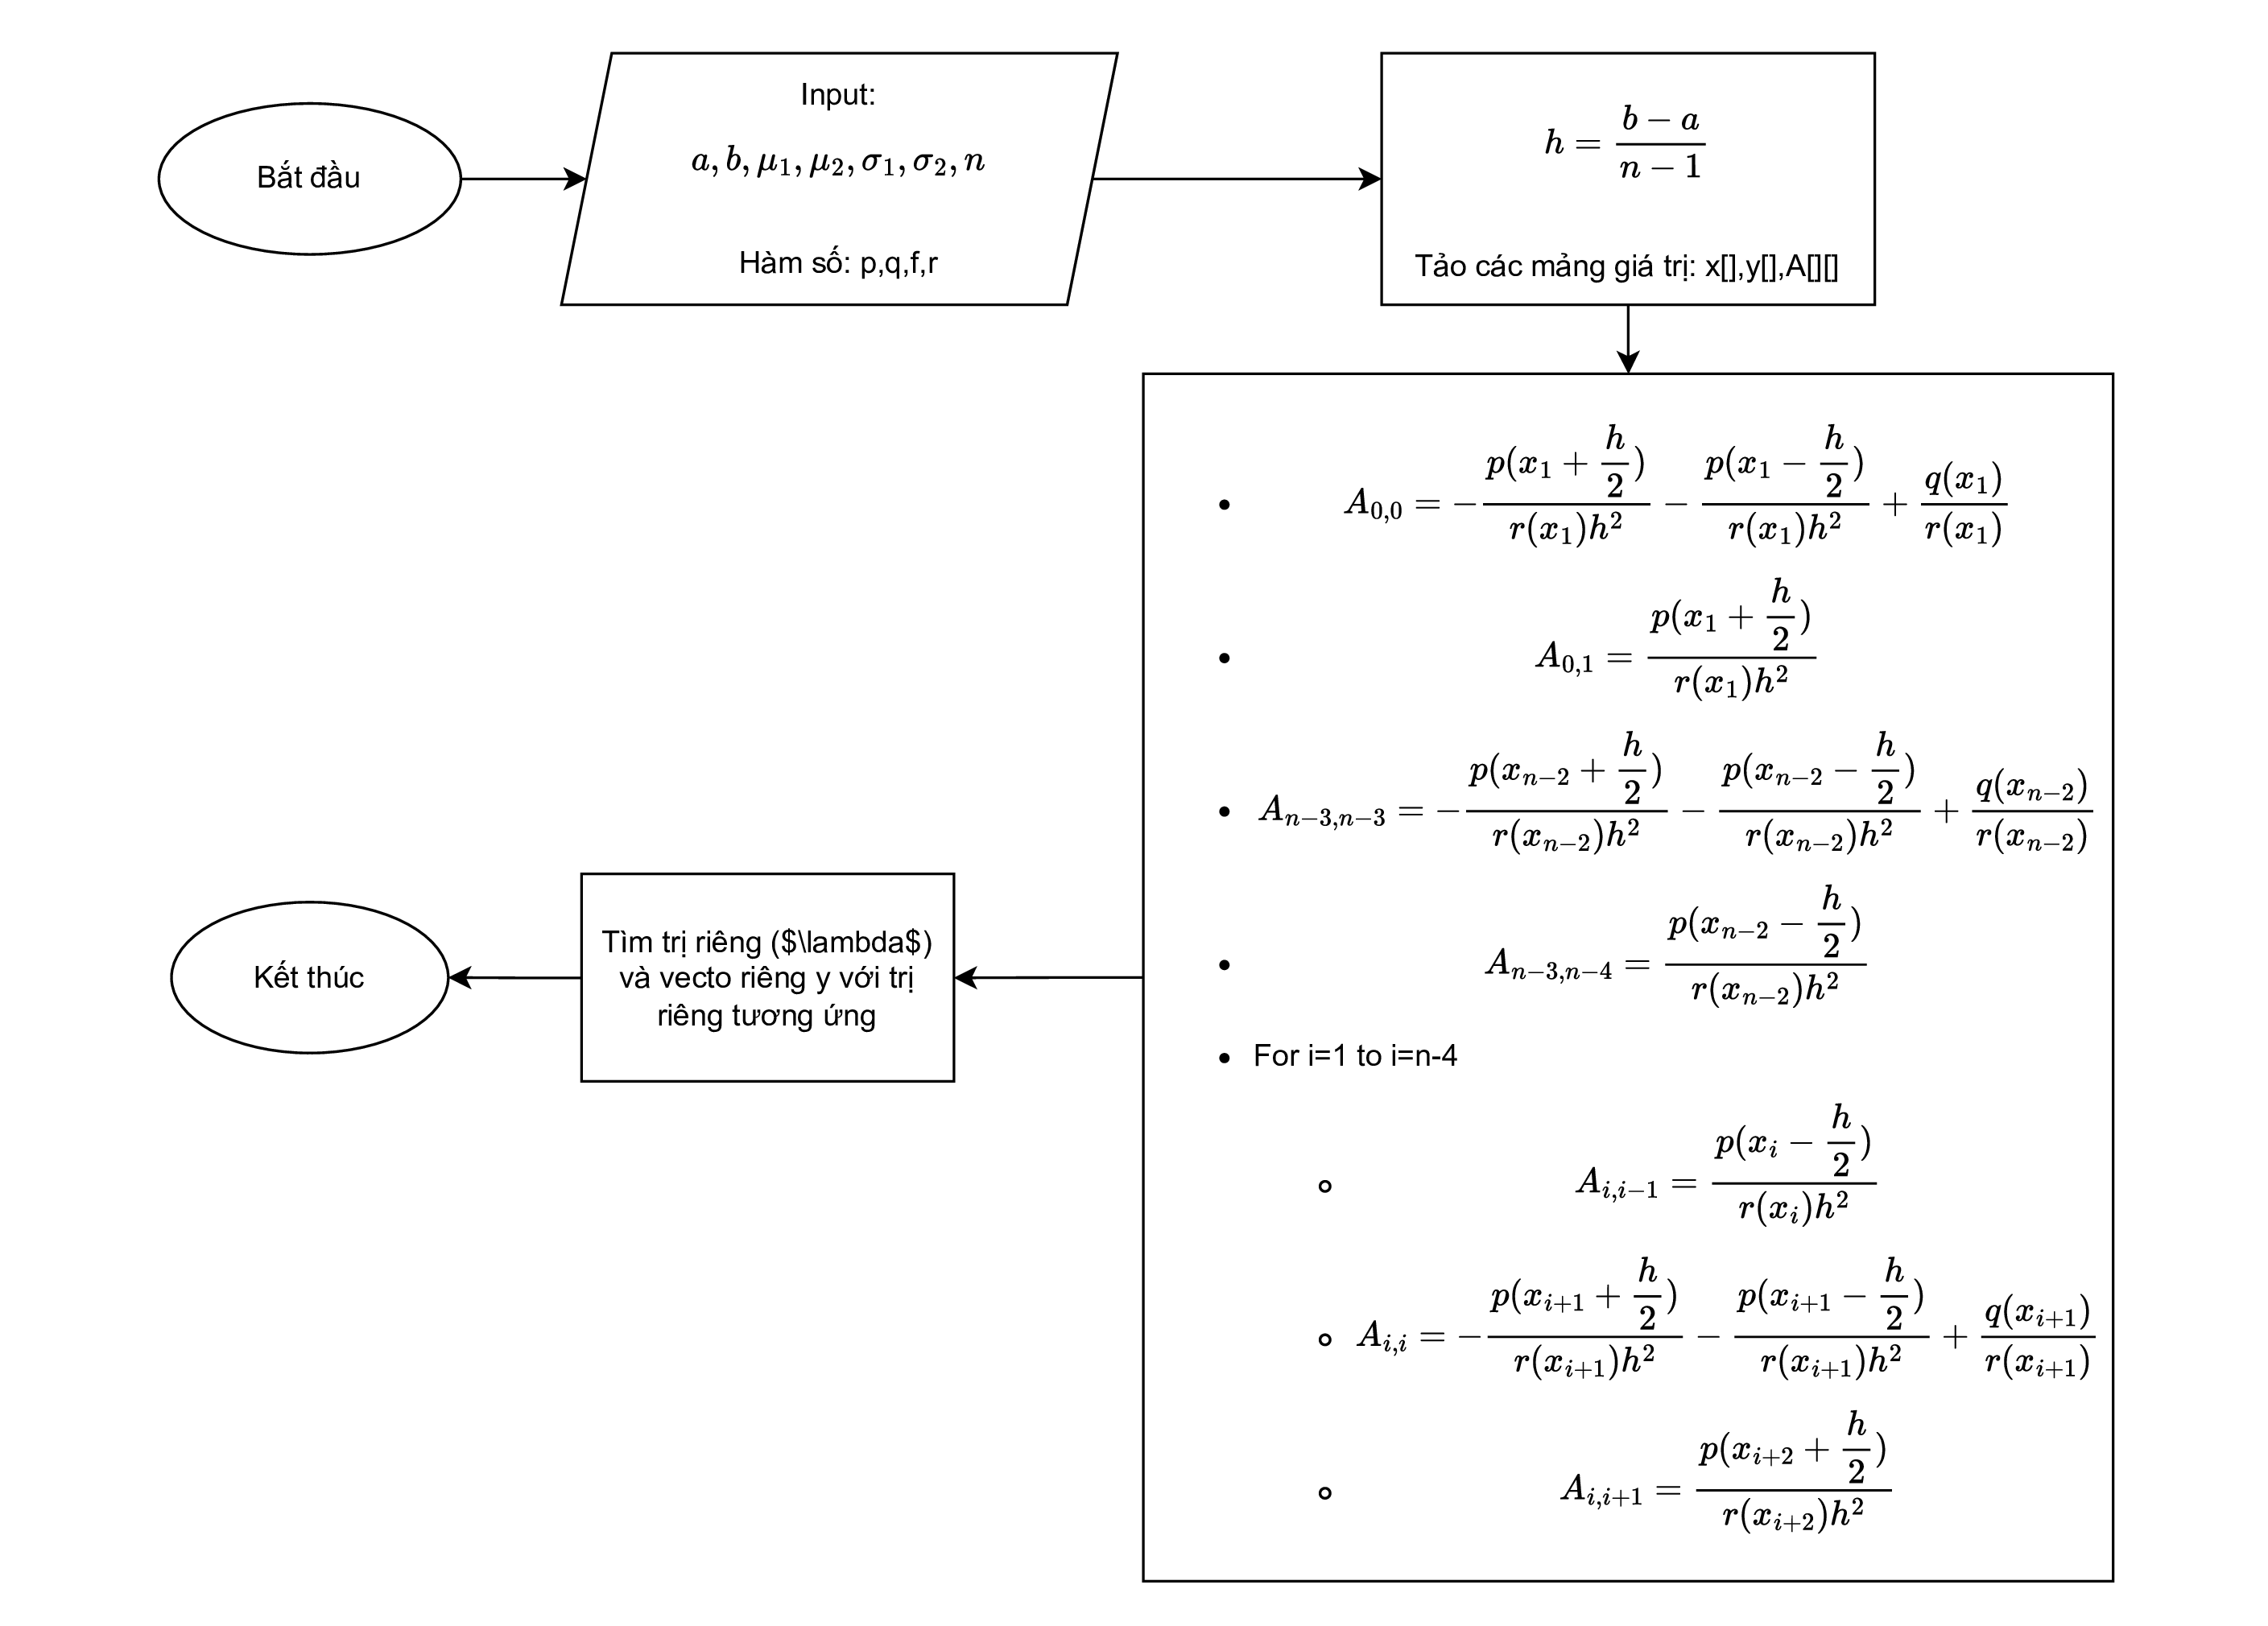

**Chương trình**

In [9]:
def tririeng(a,b,n,alpha,beta):
    h = (b-a)/(n-1)
    x = [0]*n  
    for i in range(n):
        x[i] = a + i*h
    # khởi tạo mảng A với giá trị ban đầu của tất cả phần tử là 0
    A = [[0 for j in range(n)] for i in range(n)]
    A[0][0] = -p(x[1] + h / 2) / (f(x[1])*h**2) - p(x[1] - h / 2) / (f(x[1])*h**2) - q(x[1]) / f(x[1])
    A[0][1] = p(x[1] + h / 2) / (f(x[1])*h**2)
    A[n - 3][n - 3] = -p(x[n - 2] + h / 2) / (f(x[n - 2])*h**2) - p(x[n - 2] - h / 2) / (f(x[n - 2])*h**2) + q(x[n - 2]) / f(x[n - 2])
    A[n - 3][n - 4] = p(x[n - 2] - h / 2) / (f(x[n - 2])*h**2)    
    for i in range(1, n-3):
        A[i][i - 1] = p(x[i] - h / 2) / (f(x[i])*h**2)
        A[i][i] = -p(x[i] + h / 2) / (f(x[i])*h**2) - p(x[i] - h / 2) / (f(x[i])*h**2) - q(x[i]) / f(x[i])
        A[i][i + 1] = p(x[i] + h / 2) / (f(x[i])*h**2)
    lamda, y = np.linalg.eig(A)
    location = np.where(lamda == np.max(lamda))
    return lamda[location[0][0]], np.concatenate(([alpha], y[:, location[0][0]]/y[location[0][0], 0], [beta]))

**Ví dụ:** 

$\begin{cases}
-y"=\lambda(1+x)y,\qquad 0<x<1\\
y(0)=y(1)=0
\end{cases}$

In [10]:
# Khai báo các biến
a = 0
b = 1
n = 4
def p(x):
    return -1
def q(x):
    return 0
def f(x):
    return 1+x
alpha = 0
beta = 0
tririeng(a,b,n,alpha,beta)

(18.336477188190386,
 array([ 0.        ,  1.        , -0.71651514,  0.        ,  0.        ,
         0.        ]))